In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/trysuharso/bananaapricot')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yalamanchilivenusai
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/trysuharso/bananaapricot


100%|██████████| 442k/442k [00:00<00:00, 75.7MB/s]

In [ ]:
test_dataset = "bananaapricot/images/test"
train_dataset = "bananaapricot/images/train"

In [ ]:
def count_imgs(path):
  counts ={}
  for class_name in ['Apricot', 'Banana']:
    class_path = os.path.join(path,class_name)
    counts[class_name] = len(os.listdir(class_path))

  return counts


In [ ]:
train_counts = count_imgs(train_dataset)
test_counts = count_imgs(test_dataset)

print("Training set distribution:", train_counts)
print("Test set distribution:", test_counts)

Training set distribution: {'Apricot': 50, 'Banana': 50}
Test set distribution: {'Apricot': 12, 'Banana': 13}


In [ ]:
from PIL import Image

In [ ]:
def analyze_image_sizes(path):
    sizes = []
    for class_name in ['Apricot', 'Banana']:
        class_path = os.path.join(path, class_name)
        for img_name in os.listdir(class_path):
            img = Image.open(os.path.join(class_path, img_name))
            sizes.append(img.size)
    return sizes


In [ ]:
train_sizes = analyze_image_sizes(train_dataset)
test_sizes = analyze_image_sizes(test_dataset)

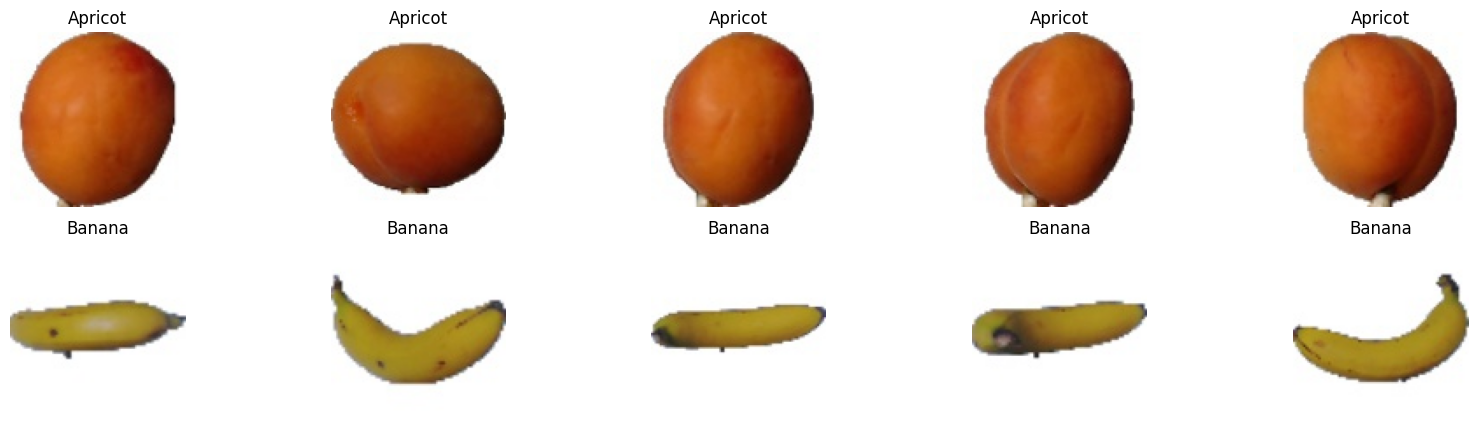

In [ ]:
def plot_samples(path, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(20, 5))
    for i, class_name in enumerate(['Apricot', 'Banana']):
        class_path = os.path.join(path, class_name)
        for j in range(num_samples):
            img = Image.open(os.path.join(class_path, os.listdir(class_path)[j]))
            axes[i,j].imshow(img)
            axes[i,j].set_title(class_name)
            axes[i,j].axis('off')
    plt.show()

plot_samples(train_dataset)


In [ ]:
# learnt new image argumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # For validation split
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dataset,
    target_size=(150, 150),  # Adjust based on your analysis
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dataset,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dataset,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history =  model.fit(train_generator, epochs=15, validation_data= val_generator )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4938 - loss: 0.8793 - val_accuracy: 0.5000 - val_loss: 0.5897
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7102 - loss: 0.4540 - val_accuracy: 1.0000 - val_loss: 0.0997
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0545 - val_accuracy: 1.0000 - val_loss: 0.0245
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9729 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 2.1469e-04
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 4.0071e-05 - val_accuracy: 1.0000 - val_loss: 8.2039e-06
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 6.3539e-04 - val_accuracy: 1.0000 - val_loss: 2.4241e-07
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 4.1861e-07 - val_accuracy: 1.0000 - val_loss: 2.1896e-08
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 8.1131e-08 - val_accuracy: 1.0000 - 

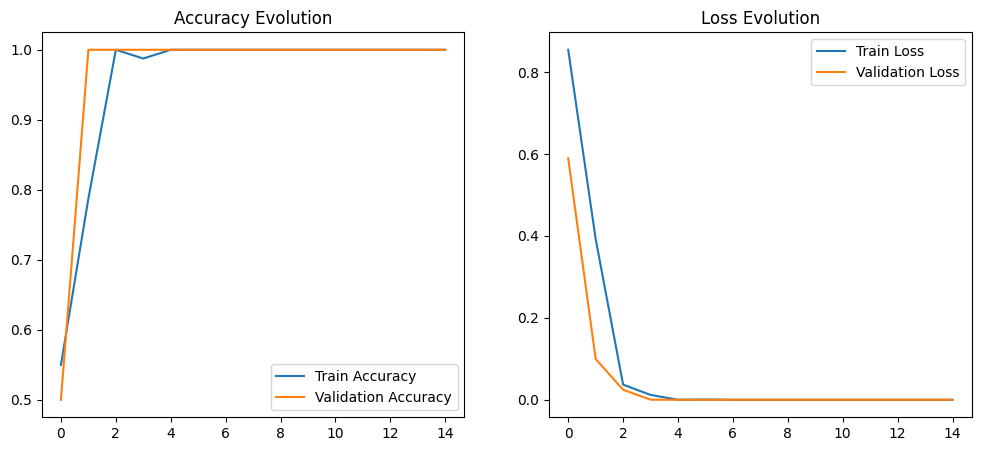

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 1.0000 - loss: 2.7428e-13
Test Accuracy: 100.00%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


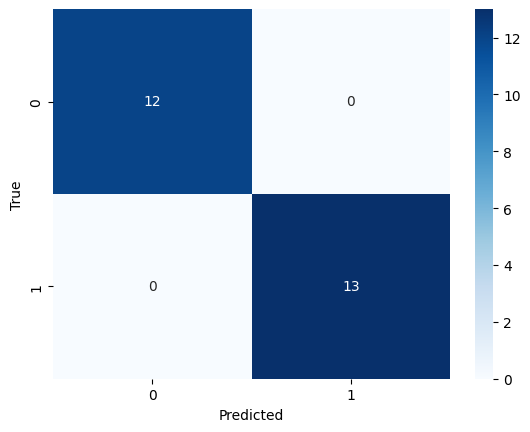

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).astype(int)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred))